# 1.  Import the relevant python libraries for the analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display
%matplotlib inline

# 2.Load the train and test dataset and set the index if applicable

In [4]:
train=pd.read_csv(r"C:\Users\Sarthak Sarkar\Downloads\titanic\train.csv")

In [5]:
display(train.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# set the index to passengerId
train = train.set_index('PassengerId')

In [8]:
#load the test dataset
test = pd.read_csv(r"C:\Users\Sarthak Sarkar\Downloads\titanic\test.csv")

In [9]:
#inspect the first few rows of the test dataset
display(test.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# 3.Visually inspect the head of the dataset,Examine the train dataset to understand in particular if the data is tidy, shape of the dataset,examine datatypes, examine missing values, unique counts and build a data dictionary dataframe

In [10]:
#by calling the shape attribute of the train dataset we can observe that there are 891 observations and 11 columns
#in the data set
train.shape

(891, 11)

In [11]:
# Check out the data summary
# Age, Cabin and Embarked has missing data
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
# identify datatypes of the 11 columns, add the stats to the datadict
datadict = pd.DataFrame(train.dtypes)
datadict

,0
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Cabin,object


In [13]:
# identify missing values of the 11 columns,add the stats to the datadict
datadict['MissingVal'] = train.isnull().sum()
datadict

,0,MissingVal
Survived,int64,0
Pclass,int64,0
Name,object,0
Sex,object,0
Age,float64,177
SibSp,int64,0
Parch,int64,0
Ticket,object,0
Fare,float64,0
Cabin,object,687


In [14]:
# identify missing values of the 11 columns,add the stats to the datadict
datadict['MissingVal'] = train.isnull().sum()
datadict

,0,MissingVal
Survived,int64,0
Pclass,int64,0
Name,object,0
Sex,object,0
Age,float64,177
SibSp,int64,0
Parch,int64,0
Ticket,object,0
Fare,float64,0
Cabin,object,687


In [15]:
# Identify the count for each variable, add the stats to datadict
datadict['Count']=train.count()
datadict

,0,MissingVal,Count
Survived,int64,0,891
Pclass,int64,0,891
Name,object,0,891
Sex,object,0,891
Age,float64,177,714
SibSp,int64,0,891
Parch,int64,0,891
Ticket,object,0,891
Fare,float64,0,891
Cabin,object,687,204


In [16]:
# rename the 0 column
datadict = datadict.rename(columns={0:'DataType'})
datadict

,DataType,MissingVal,Count
Survived,int64,0,891
Pclass,int64,0,891
Name,object,0,891
Sex,object,0,891
Age,float64,177,714
SibSp,int64,0,891
Parch,int64,0,891
Ticket,object,0,891
Fare,float64,0,891
Cabin,object,687,204


# 4.Run discriptive statistics of object and numerical datatypes, and finally transform datatypes accoringly

In [17]:
# get discripte statistcs on "object" datatypes
train.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [18]:
# get discriptive statistcs on "number" datatypes
train.describe(include=['number'])

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 5.arryout univariate and multivariate analysis using graphical and non graphical(some numbers represting the data)

In [19]:
train.Survived.value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

# Univariate Analysis 

C:\Users\Sarthak Sarkar\AppData\Local\Temp\ipykernel_23856\1139183063.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Fare'], kde=True,ax=axes[1,2])
C:\Users\Sarthak Sarkar\AppData\Local\Temp\ipykernel_23856\1139183063.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].d

<Axes: xlabel='Age', ylabel='Density'>

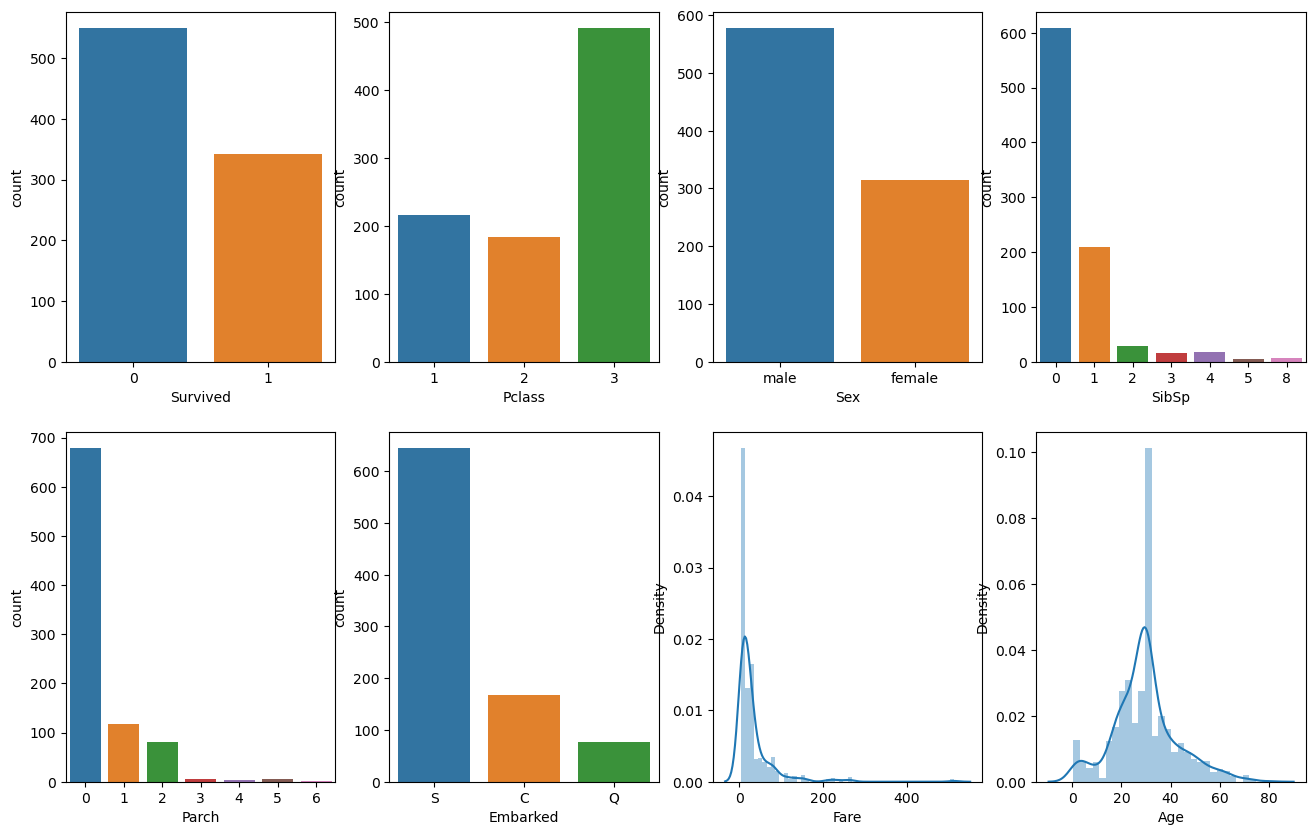

In [74]:
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
sns.countplot(x='Survived',data=train,ax=axes[0,0])
sns.countplot(x='Pclass',data=train,ax=axes[0,1])
sns.countplot(x='Sex',data=train,ax=axes[0,2])
sns.countplot(x='SibSp',data=train,ax=axes[0,3])
sns.countplot(x='Parch',data=train,ax=axes[1,0])
sns.countplot(x='Embarked',data=train,ax=axes[1,1])
sns.distplot(train['Fare'], kde=True,ax=axes[1,2])
sns.distplot(train['Age'].dropna(),kde=True,ax=axes[1,3])


<Axes: xlabel='Survived', ylabel='Fare'>

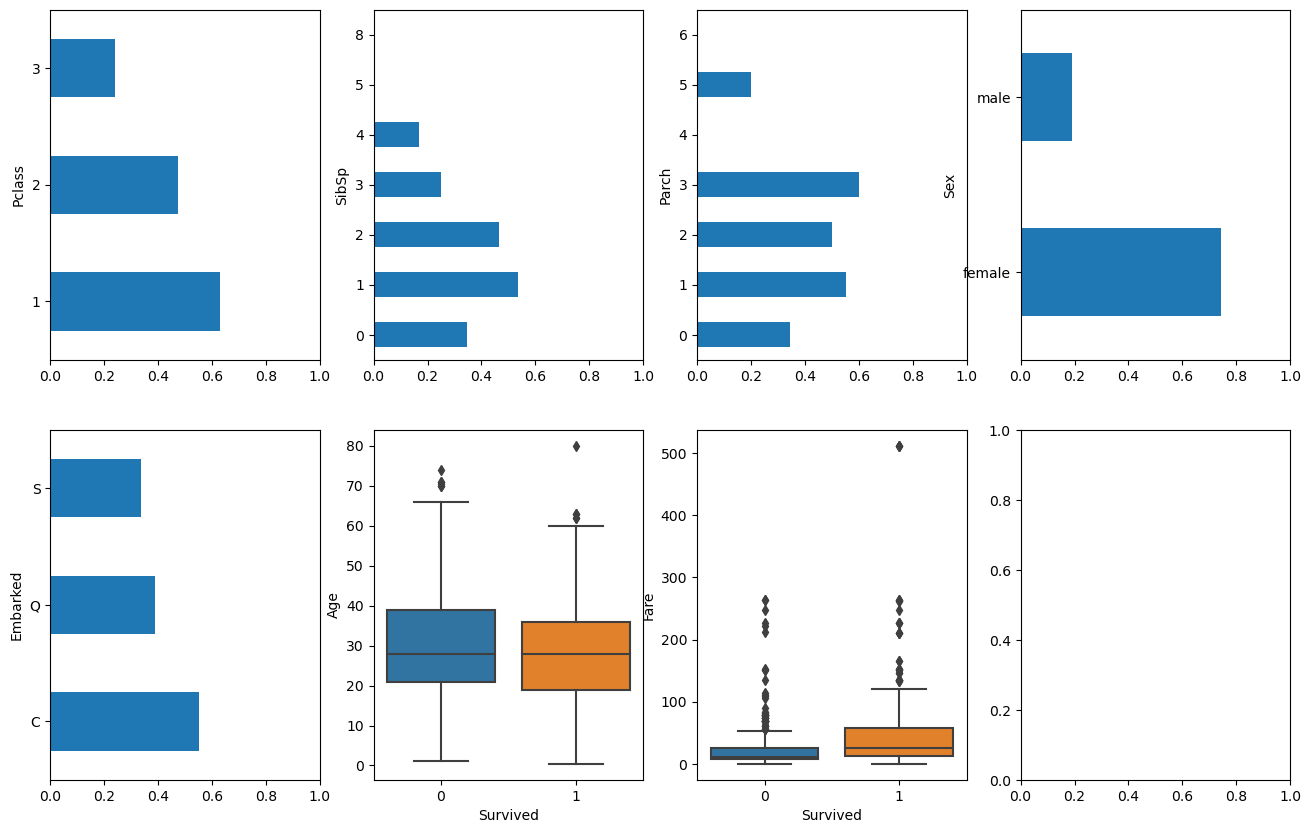

In [21]:
figbi, axesbi = plt.subplots(2, 4, figsize=(16, 10))
train.groupby('Pclass')['Survived'].mean().plot(kind='barh',ax=axesbi[0,0],xlim=[0,1])
train.groupby('SibSp')['Survived'].mean().plot(kind='barh',ax=axesbi[0,1],xlim=[0,1])
train.groupby('Parch')['Survived'].mean().plot(kind='barh',ax=axesbi[0,2],xlim=[0,1])
train.groupby('Sex')['Survived'].mean().plot(kind='barh',ax=axesbi[0,3],xlim=[0,1])
train.groupby('Embarked')['Survived'].mean().plot(kind='barh',ax=axesbi[1,0],xlim=[0,1])
sns.boxplot(x="Survived", y="Age", data=train,ax=axesbi[1,1])
sns.boxplot(x="Survived", y="Fare", data=train,ax=axesbi[1,2])

# Joint Plots(continous vs continous)¶

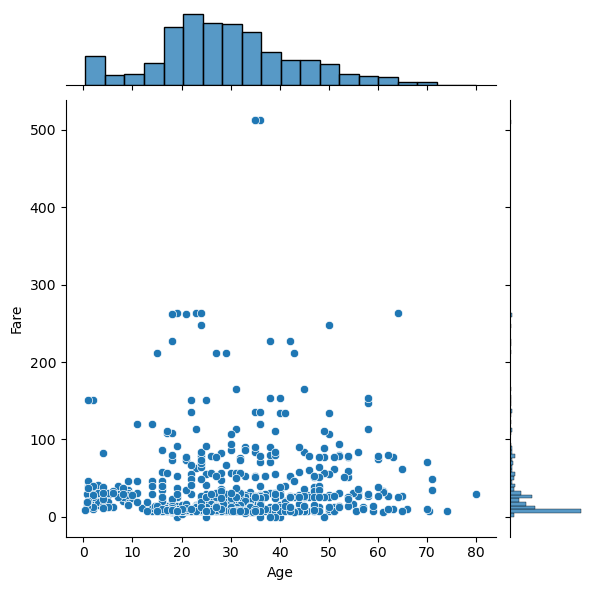

In [22]:
sns.jointplot(x="Age", y="Fare", data=train);

# 6. Feature Engineering Data- Extract title from name, Extract new features from the other features¶

In [26]:
train['Name_len']=train.Name.str.len()

In [27]:
train['Ticket_First']=train.Ticket.str[0]

In [28]:
train['FamilyCount']=train.SibSp+train.Parch

In [29]:
train['Cabin_First']=train.Cabin.str[0]

In [30]:
# Regular expression to get the title of the Name
train['title'] = train.Name.str.extract('\, ([A-Z][^ ]*\.)',expand=False)

In [31]:
train.title.value_counts().reset_index()

,title,count
0,Mr.,517
1,Miss.,182
2,Mrs.,125
3,Master.,40
4,Dr.,7
5,Rev.,6
6,Major.,2
7,Mlle.,2
8,Col.,2
9,Don.,1


# 7. Preprocessing and Prepare data for statistical modeling

In [32]:
# we see that there are 15 Zero values and its reasonbale 
# to flag them as missing values since every ticket 
# should have a value greater than 0
print((train.Fare == 0).sum())

15


In [33]:
# mark zero values as missing or NaN
train.Fare = train.Fare.replace(0, np.NaN)

In [34]:
# validate to see if there are no more zero values
print((train.Fare == 0).sum())

0


In [35]:
# keep the index
train[train.Fare.isnull()].index

Index([180, 264, 272, 278, 303, 414, 467, 482, 598, 634, 675, 733, 807, 816,
       823],
      dtype='int64', name='PassengerId')

In [36]:
train.Fare.mean()

32.75564988584475

In [37]:
# impute the missing Fare values with the mean Fare value
train.Fare.fillna(train.Fare.mean(),inplace=True)

In [38]:
# validate if any null values are present after the imputation
train[train.Fare.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_len,Ticket_First,FamilyCount,Cabin_First,title
PassengerId,,,,,,,,,,,,,,,,


In [39]:
# we see that there are 0 Zero values
print((train.Age == 0).sum())


0


In [40]:
# impute the missing Age values with the mean Fare value
train.Age.fillna(train.Age.mean(),inplace=True)

In [41]:
# validate if any null values are present after the imputation
train[train.Age.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_len,Ticket_First,FamilyCount,Cabin_First,title
PassengerId,,,,,,,,,,,,,,,,


In [42]:
# We see that a majority 77% of the Cabin variable has missing values.
# Hence will drop the column from training a machine learnign algorithem
train.Cabin.isnull().mean()

0.7710437710437711

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Name          891 non-null    object 
 3   Sex           891 non-null    object 
 4   Age           891 non-null    float64
 5   SibSp         891 non-null    int64  
 6   Parch         891 non-null    int64  
 7   Ticket        891 non-null    object 
 8   Fare          891 non-null    float64
 9   Cabin         204 non-null    object 
 10  Embarked      889 non-null    object 
 11  Name_len      891 non-null    int64  
 12  Ticket_First  891 non-null    object 
 13  FamilyCount   891 non-null    int64  
 14  Cabin_First   204 non-null    object 
 15  title         890 non-null    object 
dtypes: float64(2), int64(6), object(8)
memory usage: 118.3+ KB


# 8.Statistical Modelling

In [44]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Name_len', 'Ticket_First', 'FamilyCount',
       'Cabin_First', 'title'],
      dtype='object')

In [45]:
trainML = train[['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'Name_len', 'Ticket_First', 'FamilyCount',
       'title']]

In [46]:
# drop rows of missing values
trainML = trainML.dropna()

In [47]:
# check the datafram has any missing values
trainML.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
Name_len        0
Ticket_First    0
FamilyCount     0
title           0
dtype: int64

In [48]:
# Import Estimator AND Instantiate estimator class to create an estimator object
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [49]:
X_Age = trainML[['Age']].values
y = trainML['Survived'].values
# Use the fit method to train
lr.fit(X_Age,y)
# Make a prediction
y_predict = lr.predict(X_Age)
y_predict[:10]
(y == y_predict).mean()

0.6182432432432432

In [50]:
X_Fare = trainML[['Fare']].values
y = trainML['Survived'].values
# Use the fit method to train
lr.fit(X_Fare,y)
# Make a prediction
y_predict = lr.predict(X_Fare)
y_predict[:10]
(y == y_predict).mean()

0.6621621621621622

In [51]:
X_sex = pd.get_dummies(trainML['Sex']).values
y = trainML['Survived'].values
# Use the fit method to train
lr.fit(X_sex, y)
# Make a prediction
y_predict = lr.predict(X_sex)
y_predict[:10]
(y == y_predict).mean()

0.786036036036036

In [52]:
X_pclass = pd.get_dummies(trainML['Pclass']).values
y = trainML['Survived'].values
lr = LogisticRegression()
lr.fit(X_pclass, y)
# Make a prediction
y_predict = lr.predict(X_pclass)
y_predict[:10]
(y == y_predict).mean()

0.6779279279279279

In [53]:
from sklearn.ensemble import RandomForestClassifier
X=trainML[['Age', 'SibSp', 'Parch',
       'Fare', 'Name_len', 'FamilyCount']].values # Taking all the numerical values
y = trainML['Survived'].values
RF = RandomForestClassifier()
RF.fit(X, y)
# Make a prediction
y_predict = RF.predict(X)
y_predict[:10]
(y == y_predict).mean()

0.9887387387387387